https://www.kaggle.com/crawford/gene-expression ---- This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray).These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).Intensity values have been re-scaled such that overall intensities for each chip are equivalent.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.decomposition import PCA

In [0]:
trainset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/actual.csv")
trainset.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [0]:
train_x = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_set_ALL_AML_train.csv")
train_x.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,5,call.4,6,call.5,7,call.6,8,call.7,9,call.8,10,call.9,11,call.10,12,call.11,13,call.12,14,call.13,15,call.14,16,call.15,17,call.16,18,call.17,19,call.18,20,call.19,21,call.20,22,call.21,23,call.22,24,call.23,25,call.24,26,call.25,27,call.26,34,call.27,35,call.28,36,call.29,37,call.30,38,call.31,28,call.32,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,-106,A,-138,A,-72,A,-413,A,5,A,-88,A,-165,A,-67,A,-92,A,-113,A,-107,A,-117,A,-476,A,-81,A,-44,A,17,A,-144,A,-247,A,-74,A,-120,A,-81,A,-112,A,-273,A,-20,A,7,A,-213,A,-25,A,-72,A,-4,A,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,-125,A,-85,A,-144,A,-260,A,-127,A,-105,A,-155,A,-93,A,-119,A,-147,A,-72,A,-219,A,-213,A,-150,A,-51,A,-229,A,-199,A,-90,A,-321,A,-263,A,-150,A,-233,A,-327,A,-207,A,-100,A,-252,A,-20,A,-139,A,-116,A,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,-76,A,215,A,238,A,7,A,106,A,42,A,-71,A,84,A,-31,A,-118,A,-126,A,-50,A,-18,A,-119,A,100,A,79,A,-157,A,-168,A,-11,A,-114,A,-85,A,-78,A,-76,A,-50,A,-57,A,136,A,124,A,-1,A,-125,A,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,168,A,71,A,55,A,-2,A,268,A,219,M,82,A,25,A,173,A,243,M,149,A,257,A,301,A,78,A,207,A,218,A,132,A,-24,A,-36,A,255,A,316,A,54,A,81,A,101,A,132,A,318,A,325,A,392,P,241,A,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,-230,A,-272,A,-399,A,-541,A,-210,A,-178,A,-163,A,-179,A,-233,A,-127,A,-205,A,-218,A,-403,A,-152,A,-146,A,-262,A,-151,A,-308,A,-317,A,-342,A,-418,A,-244,A,-439,A,-369,A,-377,A,-209,A,-396,A,-324,A,-191,A,-51,A,-139,A,-367,A,-188,A,-407,A


In [0]:
test_x = pd.read_csv("/content/drive/My Drive/Colab Notebooks/independent.csv")
print(type(test_x))
test_x.head()

<class 'pandas.core.frame.DataFrame'>


,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,48,call.4,49,call.5,41,call.6,43,call.7,44,call.8,45,call.9,46,call.10,70,call.11,71,call.12,72,call.13,68,call.14,69,call.15,67,call.16,55,call.17,56,call.18,59,call.19,52,call.20,53,call.21,51,call.22,50,call.23,54,call.24,57,call.25,58,call.26,60,call.27,61,call.28,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,-130,A,-256,A,-62,A,86,A,-146,A,-187,A,-56,A,-55,A,-59,A,-131,A,-154,A,-79,A,-76,A,-34,A,-95,A,-12,A,-21,A,-202,A,-112,A,-118,A,-90,A,-137,A,-157,A,-172,A,-47,A,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,-177,A,-249,A,-23,A,-36,A,-74,A,-187,A,-43,A,-44,A,-114,A,-126,A,-136,A,-118,A,-98,A,-144,A,-118,A,-172,A,-13,A,-274,A,-185,A,-142,A,-87,A,-51,A,-370,A,-122,A,-442,A,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,-28,A,-410,A,-7,A,-141,A,170,A,312,A,43,A,12,A,23,A,-50,A,49,A,-30,A,-153,A,-17,A,59,A,12,A,8,A,59,A,24,A,212,A,102,A,-82,A,-77,A,38,A,-21,A,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,266,A,24,A,142,A,252,A,174,A,142,A,177,A,129,A,146,A,211,A,180,A,68,A,237,A,152,A,270,A,172,A,38,A,309,A,170,A,314,A,319,P,178,A,340,A,31,A,396,A,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,-170,A,-535,A,-233,A,-201,A,-32,A,114,A,-116,A,-108,A,-171,A,-206,A,-257,A,-110,A,-215,A,-174,A,-229,A,-137,A,-128,A,-456,A,-197,A,-401,A,-283,A,-135,A,-438,A,-201,A,-351,A,-256,A,-191,A,-172,A,-496,A,-294,A


1.Remove columns that contain "Call" data
2.Transpose the dataframe so that each row is a patient and each column is a gene
3.Remove gene description header and set the gene accession numbers as the column headers
4.Split into train/test sets
5.Scale values to zero mean and unit variance
6.PCA for dimensionality reduction and using various ml models : KNN,svm or kernel svm,decision tree,random forest
7.ANN --- deep learning technique

# ***analyzing and visualising the data set***

In [0]:
print("the train set (dependent)size is",train_x.shape)
print("the train set (independent)size is",trainset.shape)
print("the test set size is",test_x.shape)
print("row indicates genes and columns indicate patients and we have to process the data logically before proceeding")

the train set (dependent)size is (7129, 78)
the train set (independent)size is (72, 2)
the test set size is (7129, 70)
row indicates genes and columns indicate patients and we have to process the data logically before proceeding


In [0]:
train_x.columns

Index(['Gene Description', 'Gene Accession Number', '1', 'call', '2', 'call.1',
       '3', 'call.2', '4', 'call.3', '5', 'call.4', '6', 'call.5', '7',
       'call.6', '8', 'call.7', '9', 'call.8', '10', 'call.9', '11', 'call.10',
       '12', 'call.11', '13', 'call.12', '14', 'call.13', '15', 'call.14',
       '16', 'call.15', '17', 'call.16', '18', 'call.17', '19', 'call.18',
       '20', 'call.19', '21', 'call.20', '22', 'call.21', '23', 'call.22',
       '24', 'call.23', '25', 'call.24', '26', 'call.25', '27', 'call.26',
       '34', 'call.27', '35', 'call.28', '36', 'call.29', '37', 'call.30',
       '38', 'call.31', '28', 'call.32', '29', 'call.33', '30', 'call.34',
       '31', 'call.35', '32', 'call.36', '33', 'call.37'],
      dtype='object')

In [0]:
train_x.isnull().sum()   #finding missing value

Gene Description         0
Gene Accession Number    0
1                        0
call                     0
2                        0
                        ..
call.35                  0
32                       0
call.36                  0
33                       0
call.37                  0
Length: 78, dtype: int64

In [0]:
#call column can be omitted ---P,A,M
new_col = [col for col in train_x.columns if "call" not in col]
new_col

['Gene Description',
 'Gene Accession Number',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '34',
 '35',
 '36',
 '37',
 '38',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33']

In [0]:
x = train_x[new_col]
print(type(x))
x.head()

<class 'pandas.core.frame.DataFrame'>


,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,34,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,-165,-67,-92,-113,-107,-117,-476,-81,-44,17,-144,-247,-74,-120,-81,-112,-273,-20,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,-155,-93,-119,-147,-72,-219,-213,-150,-51,-229,-199,-90,-321,-263,-150,-233,-327,-207,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,106,42,-71,84,-31,-118,-126,-50,-18,-119,100,79,-157,-168,-11,-114,-85,-78,-76,-50,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,268,219,82,25,173,243,149,257,301,78,207,218,132,-24,-36,255,316,54,81,101,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,-163,-179,-233,-127,-205,-218,-403,-152,-146,-262,-151,-308,-317,-342,-418,-244,-439,-369,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [0]:
x = x.transpose()
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7089,7090,7091,7092,7093,7094,7095,7096,7097,7098,7099,7100,7101,7102,7103,7104,7105,7106,7107,7108,7109,7110,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),AFFX-BioB-M_st (endogenous control),AFFX-BioB-3_st (endogenous control),AFFX-BioC-5_st (endogenous control),AFFX-BioC-3_st (endogenous control),AFFX-BioDn-5_st (endogenous control),AFFX-BioDn-3_st (endogenous control),AFFX-CreX-5_st (endogenous control),AFFX-CreX-3_st (endogenous control),hum_alu_at (miscellaneous control),AFFX-DapX-5_at (endogenous control),AFFX-DapX-M_at (endogenous control),AFFX-DapX-3_at (endogenous control),AFFX-LysX-5_at (endogenous control),AFFX-LysX-M_at (endogenous control),AFFX-LysX-3_at (endogenous control),AFFX-PheX-5_at (endogenous control),AFFX-PheX-M_at (endogenous control),AFFX-PheX-3_at (endogenous control),AFFX-ThrX-5_at (endogenous control),AFFX-ThrX-M_at (endogenous control),AFFX-ThrX-3_at (endogenous control),AFFX-TrpnX-5_at (endogenous control),AFFX-TrpnX-M_at (endogenous control),AFFX-TrpnX-3_at (endogenous control),AFFX-HUMISGF3A/M97935_5_at (endogenous control),AFFX-HUMISGF3A/M97935_MA_at (endogenous control),AFFX-HUMISGF3A/M97935_MB_at (endogenous control),AFFX-HUMISGF3A/M97935_3_at (endogenous control),AFFX-HUMRGE/M10098_5_at (endogenous control),AFFX-HUMRGE/M10098_M_at (endogenous control),...,GB DEF = SPR2-1 gene for small proline rich pr...,Metallothionein,GB DEF = Glutamate dehydrogenase,PRSS3 Protease; serine; 3 (trypsin 3),GB DEF = Transmembrane protein Tmp21-IIex,GB DEF = H2B/h gene,ACTB Actin; beta,GAPD Glyceraldehyde-3-phosphate dehydrogenase,CYTOCHROME P450 IA2,Nkat2b mRNA,Natural killer cell receptor (KIR) mRNA,Major Histocompatibility Complex; Class I; C (...,HLA-A MHC class I protein HLA-A (HLA-A28;-B40;...,PRB2 locus salivary proline-rich protein mRNA;...,HLA CLASS II HISTOCOMPATIBILITY ANTIGEN; DQ(W1...,GB DEF = (HLCC85) mRNA for voltage-dependent L...,GB DEF = Endogenous retrovirus clone P1.8 poly...,Integrase gene extracted from Human endogenous...,WUGSC:GS345D13.2 gene (G-protein gamma-1 subun...,TIAL1 TIA1 cytotoxic granule-associated RNA-bi...,Ras-Specific Guanine Nucleotide-Releasing Factor,TYROSINE-PROTEIN KINASE ITK/TSK,(clone p4) 50 kD dystrophin-associated glycopr...,Ifp35 gene extracted from Human BRCA1; Rho7 an...,INHA Inhibin; alpha,S100A9 S100 calcium-binding protein A9 (calgra...,PLGL Plasminogen-like protein,ID1 Inhibitor of DNA binding 1; dominant negat...,ABP1 Amiloride binding protein 1 (amine oxidas...,Transcriptional activator hSNF2b,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,AFFX-BioB-M_st,AFFX-BioB-3_st,AFFX-BioC-5_st,AFFX-BioC-3_st,AFFX-BioDn-5_st,AFFX-BioDn-3_st,AFFX-CreX-5_st,AFFX-CreX-3_st,hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-LysX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-PheX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-ThrX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-TrpnX-

In [0]:
x.columns

RangeIndex(start=0, stop=7129, step=1)

In [0]:
x.columns.size

7129

In [0]:
x.drop(['Gene Description','Gene Accession Number'],axis = 0,inplace=True)
x.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7089,7090,7091,7092,7093,7094,7095,7096,7097,7098,7099,7100,7101,7102,7103,7104,7105,7106,7107,7108,7109,7110,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,-41,-831,-653,-462,75,381,-118,-565,15091,7,311,-231,21,-107,165,-78,-204,29,-61,-105,-366,-41,-346,-297,-109,-13,215,797,14538,9738,...,391,-763,172,149,341,788,21210,13771,598,396,245,14476,10882,701,2762,-325,-67,346,-68,229,-14,108,28,349,61,273,384,-306,-1827,1582,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,19,-743,-239,-83,182,164,-141,-423,11038,37,134,-161,-21,-180,18,-120,-65,97,15,-49,-330,-41,-772,-259,-192,-219,116,433,615,115,...,200,51,154,418,433,736,21059,15097,563,171,-149,13686,11789,76,1567,-191,-88,290,14,194,56,303,-242,214,-28,143,231,-336,-2380,624,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,19,-1135,-962,-232,208,432,84,-501,16692,183,378,-221,67,-203,238,-124,-161,36,-23,-80,-481,-65,-620,-269,-136,104,476,1474,5669,3272,...,387,-474,180,272,591,959,24292,17378,1808,363,325,6560,5023,804,1090,-258,9,220,-58,294,95,143,-25,464,513,238,720,-204,-1772,753,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,363,-934,-577,-214,142,271,-107,-101,15763,45,268,-27,43,-52,247,-116,-208,22,-10,-74,-240,-33,-560,-261,-366,-148,155,415,4850,2293,...,317,-336,325,149,173,431,17558,13818,576,455,594,8955,9567,367,1708,-357,45,430,-35,128,42,22,-131,342,142,277,307,-320,-2022,743,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,155,-471,-490,-184,32,213,1,-260,18128,-28,118,-153,-8,-111,44,-88,-102,32,5,-18,-228,53,-348,-169,-156,-55,122,483,1284,2731,...,162,-56,279,183,259,605,18530,15619,65,122,126,8443,8512,182,1503,-78,29,159,18,71,42,44,-33,159,71,134,178,-182,-179,626,156,649,57,504,-26,250,314,14,56,-25


In [0]:
new_col_list = []
for i in range(x.columns.size) :
  new_col_list.append('gene '+str(i+1))
new_col_list
 
 

['gene 1',
 'gene 2',
 'gene 3',
 'gene 4',
 'gene 5',
 'gene 6',
 'gene 7',
 'gene 8',
 'gene 9',
 'gene 10',
 'gene 11',
 'gene 12',
 'gene 13',
 'gene 14',
 'gene 15',
 'gene 16',
 'gene 17',
 'gene 18',
 'gene 19',
 'gene 20',
 'gene 21',
 'gene 22',
 'gene 23',
 'gene 24',
 'gene 25',
 'gene 26',
 'gene 27',
 'gene 28',
 'gene 29',
 'gene 30',
 'gene 31',
 'gene 32',
 'gene 33',
 'gene 34',
 'gene 35',
 'gene 36',
 'gene 37',
 'gene 38',
 'gene 39',
 'gene 40',
 'gene 41',
 'gene 42',
 'gene 43',
 'gene 44',
 'gene 45',
 'gene 46',
 'gene 47',
 'gene 48',
 'gene 49',
 'gene 50',
 'gene 51',
 'gene 52',
 'gene 53',
 'gene 54',
 'gene 55',
 'gene 56',
 'gene 57',
 'gene 58',
 'gene 59',
 'gene 60',
 'gene 61',
 'gene 62',
 'gene 63',
 'gene 64',
 'gene 65',
 'gene 66',
 'gene 67',
 'gene 68',
 'gene 69',
 'gene 70',
 'gene 71',
 'gene 72',
 'gene 73',
 'gene 74',
 'gene 75',
 'gene 76',
 'gene 77',
 'gene 78',
 'gene 79',
 'gene 80',
 'gene 81',
 'gene 82',
 'gene 83',
 'gene 84',
 

In [0]:
x.columns = new_col_list
x.columns

Index(['gene 1', 'gene 2', 'gene 3', 'gene 4', 'gene 5', 'gene 6', 'gene 7',
       'gene 8', 'gene 9', 'gene 10',
       ...
       'gene 7120', 'gene 7121', 'gene 7122', 'gene 7123', 'gene 7124',
       'gene 7125', 'gene 7126', 'gene 7127', 'gene 7128', 'gene 7129'],
      dtype='object', length=7129)

In [0]:
print(x.index.size)
x.index

38


Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '34', '35', '36', '37', '38', '28', '29', '30', '31', '32',
       '33'],
      dtype='object')

In [0]:
new_row_list = []
for i in range(x.index.size) :
  new_row_list.append('patient '+str(i+1))
print(new_row_list)
x.index = new_row_list
x
print(type(x))

['patient 1', 'patient 2', 'patient 3', 'patient 4', 'patient 5', 'patient 6', 'patient 7', 'patient 8', 'patient 9', 'patient 10', 'patient 11', 'patient 12', 'patient 13', 'patient 14', 'patient 15', 'patient 16', 'patient 17', 'patient 18', 'patient 19', 'patient 20', 'patient 21', 'patient 22', 'patient 23', 'patient 24', 'patient 25', 'patient 26', 'patient 27', 'patient 28', 'patient 29', 'patient 30', 'patient 31', 'patient 32', 'patient 33', 'patient 34', 'patient 35', 'patient 36', 'patient 37', 'patient 38']
<class 'pandas.core.frame.DataFrame'>


In [0]:
y = pd.get_dummies(trainset['cancer'])
y['ALL']

0     1
1     1
2     1
3     1
4     1
     ..
67    1
68    1
69    1
70    1
71    1
Name: ALL, Length: 72, dtype: uint8

In [0]:
y.drop(['ALL'],axis = 1,inplace = True)
y

,AML
0,0
1,0
2,0
3,0
4,0
...,...
67,0
68,0
69,0
70,0


In [0]:
trainset.columns

Index(['patient', 'cancer'], dtype='object')

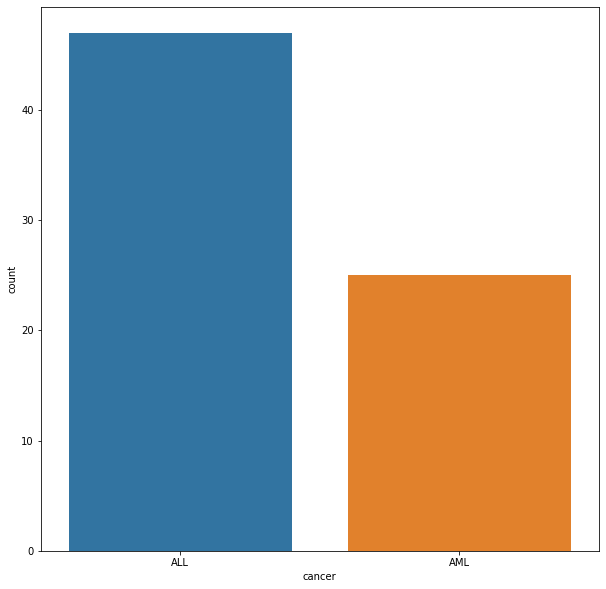

In [0]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(x='cancer',data=trainset)
plt.show()

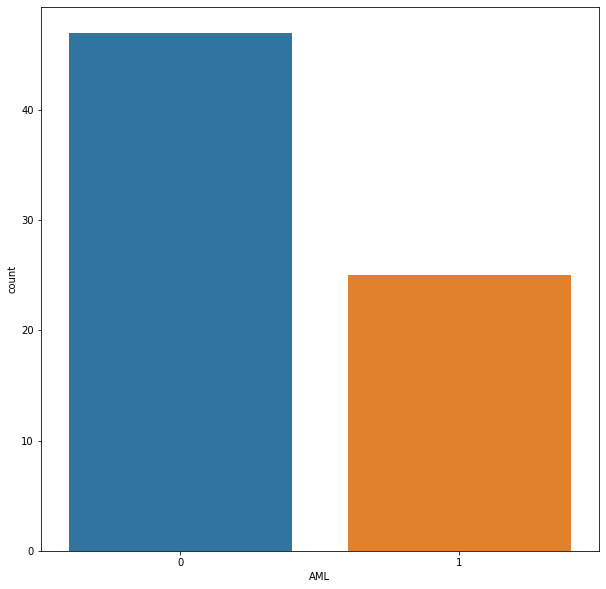

In [0]:

plt.figure(figsize=(10,10))
sns.countplot(x='AML',data=y)
plt.show()

In [0]:
train_y = y.iloc[0:38,:].values
print(train_y.shape)


(38, 1)


## preparing test data set

In [0]:
new_col1 = [col for col in test_x.columns if "call" not in col]
test_x = test_x[new_col1]
test_x.head()#columns contain patients from 39 to 72

,Gene Description,Gene Accession Number,39,40,42,47,48,49,41,43,44,45,46,70,71,72,68,69,67,55,56,59,52,53,51,50,54,57,58,60,61,65,66,63,64,62
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,-146,-187,-56,-55,-59,-131,-154,-79,-76,-34,-95,-12,-21,-202,-112,-118,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,-74,-187,-43,-44,-114,-126,-136,-118,-98,-144,-118,-172,-13,-274,-185,-142,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,170,312,43,12,23,-50,49,-30,-153,-17,59,12,8,59,24,212,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,276,182,266,24,142,252,174,142,177,129,146,211,180,68,237,152,270,172,38,309,170,314,319,178,340,31,396,141,95,146,431,9
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-211,-289,-170,-535,-233,-201,-32,114,-116,-108,-171,-206,-257,-110,-215,-174,-229,-137,-128,-456,-197,-401,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


In [0]:
test_x.columns

Index(['Gene Description', 'Gene Accession Number', '39', '40', '42', '47',
       '48', '49', '41', '43', '44', '45', '46', '70', '71', '72', '68', '69',
       '67', '55', '56', '59', '52', '53', '51', '50', '54', '57', '58', '60',
       '61', '65', '66', '63', '64', '62'],
      dtype='object')

In [0]:
test_x = test_x.transpose()

In [0]:
test_x.drop(['Gene Description','Gene Accession Number'],axis = 0,inplace=True)
test_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7089,7090,7091,7092,7093,7094,7095,7096,7097,7098,7099,7100,7101,7102,7103,7104,7105,7106,7107,7108,7109,7110,7111,7112,7113,7114,7115,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,48,-591,-622,-342,294,241,-7,-108,45815,57,422,-185,-48,-181,-4,-132,-2,115,41,-50,-202,113,-557,-687,-289,-195,135,267,57,-238,...,429,-605,-2,603,381,2435,20818,12869,835,388,-118,16456,12103,451,3239,-352,41,547,-50,156,41,19,323,420,231,246,533,-101,-451,2112,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,207,-960,-622,175,171,-71,-163,-445,20958,21,137,-83,30,81,300,-76,-234,-49,24,-52,-370,-35,-616,-409,-417,-589,96,373,-175,-304,...,111,-644,117,-96,288,-23,9499,17954,569,276,-229,18764,10349,204,9883,-304,-109,383,-13,303,117,87,-142,212,5,325,80,-518,-2406,1323,83,529,-295,352,-67,67,263,-33,-33,-21
42,22,-153,17,276,-211,-250,55,-141,0,500,58,-517,-24,-99,13,-77,-182,-150,25880,41,70,-12,37,-15,49,-52,-120,-23,-37,-70,-254,51,-340,-149,-153,-124,194,532,-55,-341,...,186,-770,478,374,363,547,20485,17102,1383,96,189,16180,19089,6,1038,-131,37,355,15,179,87,77,192,235,95,189,243,-189,-3710,826,413,399,16,558,24,893,297,6,1971,-42
47,-243,-218,-163,182,-289,-268,-285,-172,52,-134,-140,-321,-439,-149,-56,117,-31,-243,41275,84,178,-172,-14,-271,73,18,-2,16,-23,102,18,8,-462,-212,-191,52,203,1466,-18,-189,...,172,-224,58,271,205,317,11122,17048,199,147,27,10313,8428,199,3242,-69,8,121,-39,18,-54,-6,-197,262,-16,23,168,-180,-1460,613,174,277,6,81,2,722,170,0,510,-73
48,-130,-177,-28,266,-170,-326,-222,-93,10,159,-3,-643,-502,-129,-31,247,-100,-498,11195,-20,188,-75,-29,-19,150,-119,-82,-63,-44,-24,-232,31,-701,-366,-413,-437,54,650,1453,632,...,114,-541,232,290,322,742,17100,12692,210,226,208,14833,12933,530,1350,-124,7,269,2,200,69,63,147,285,-10,296,413,-146,-677,1475,233,643,51,450,-46,612,370,29,333,-19


In [0]:
new_col_list1 = []
for i in range(test_x.columns.size) :
  new_col_list1.append('gene '+str(i+1))
#print(new_col_list1)
test_x.columns = new_col_list1


In [0]:
test_x.index.size

34

In [0]:
new_row_list1 = []
for i in range(test_x.index.size) :
  new_row_list1.append('patient '+str(i+1))
#print(new_row_list1)
test_x.index = new_row_list1

In [0]:
test_x.head()

,gene 1,gene 2,gene 3,gene 4,gene 5,gene 6,gene 7,gene 8,gene 9,gene 10,gene 11,gene 12,gene 13,gene 14,gene 15,gene 16,gene 17,gene 18,gene 19,gene 20,gene 21,gene 22,gene 23,gene 24,gene 25,gene 26,gene 27,gene 28,gene 29,gene 30,gene 31,gene 32,gene 33,gene 34,gene 35,gene 36,gene 37,gene 38,gene 39,gene 40,...,gene 7090,gene 7091,gene 7092,gene 7093,gene 7094,gene 7095,gene 7096,gene 7097,gene 7098,gene 7099,gene 7100,gene 7101,gene 7102,gene 7103,gene 7104,gene 7105,gene 7106,gene 7107,gene 7108,gene 7109,gene 7110,gene 7111,gene 7112,gene 7113,gene 7114,gene 7115,gene 7116,gene 7117,gene 7118,gene 7119,gene 7120,gene 7121,gene 7122,gene 7123,gene 7124,gene 7125,gene 7126,gene 7127,gene 7128,gene 7129
patient 1,-342,-200,41,328,-224,-427,-656,-292,137,-144,48,-591,-622,-342,294,241,-7,-108,45815,57,422,-185,-48,-181,-4,-132,-2,115,41,-50,-202,113,-557,-687,-289,-195,135,267,57,-238,...,429,-605,-2,603,381,2435,20818,12869,835,388,-118,16456,12103,451,3239,-352,41,547,-50,156,41,19,323,420,231,246,533,-101,-451,2112,277,1023,67,214,-135,1074,475,48,168,-70
patient 2,-87,-248,262,295,-226,-493,367,-452,194,162,207,-960,-622,175,171,-71,-163,-445,20958,21,137,-83,30,81,300,-76,-234,-49,24,-52,-370,-35,-616,-409,-417,-589,96,373,-175,-304,...,111,-644,117,-96,288,-23,9499,17954,569,276,-229,18764,10349,204,9883,-304,-109,383,-13,303,117,87,-142,212,5,325,80,-518,-2406,1323,83,529,-295,352,-67,67,263,-33,-33,-21
patient 3,22,-153,17,276,-211,-250,55,-141,0,500,58,-517,-24,-99,13,-77,-182,-150,25880,41,70,-12,37,-15,49,-52,-120,-23,-37,-70,-254,51,-340,-149,-153,-124,194,532,-55,-341,...,186,-770,478,374,363,547,20485,17102,1383,96,189,16180,19089,6,1038,-131,37,355,15,179,87,77,192,235,95,189,243,-189,-3710,826,413,399,16,558,24,893,297,6,1971,-42
patient 4,-243,-218,-163,182,-289,-268,-285,-172,52,-134,-140,-321,-439,-149,-56,117,-31,-243,41275,84,178,-172,-14,-271,73,18,-2,16,-23,102,18,8,-462,-212,-191,52,203,1466,-18,-189,...,172,-224,58,271,205,317,11122,17048,199,147,27,10313,8428,199,3242,-69,8,121,-39,18,-54,-6,-197,262,-16,23,168,-180,-1460,613,174,277,6,81,2,722,170,0,510,-73
patient 5,-130,-177,-28,266,-170,-326,-222,-93,10,159,-3,-643,-502,-129,-31,247,-100,-498,11195,-20,188,-75,-29,-19,150,-119,-82,-63,-44,-24,-232,31,-701,-366,-413,-437,54,650,1453,632,...,114,-541,232,290,322,742,17100,12692,210,226,208,14833,12933,530,1350,-124,7,269,2,200,69,63,147,285,-10,296,413,-146,-677,1475,233,643,51,450,-46,612,370,29,333,-19


In [0]:
test_y = y.iloc[38:,:].values
test_y.size

34

x,train_y,test_x,test_y are the splited dataset for training and testing purpose

In [0]:
print(x.shape,train_y.shape)
print(test_x.shape,test_y.shape)
print(type(x))

(38, 7129) (38, 1)
(34, 7129) (34, 1)
<class 'pandas.core.frame.DataFrame'>


#scaling the features and apply PCA




In [0]:
X_train_fl = x.astype(float, 64)
X_test_fl = test_x.astype(float, 64)

# Apply the same scaling to both datasets


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train_fl)
X_test_scl = scaler.transform(X_test_fl)
X_train_scl

array([[-0.86149567, -0.03310102, -0.3517011 , ...,  0.54606799,
        -0.43582025, -0.25587506],
       [-0.16772267,  1.03740009,  0.13913948, ..., -0.26704265,
        -0.59574421,  0.49964792],
       [ 0.41504666,  1.35855042, -2.49589941, ...,  0.70869012,
        -0.38436645, -0.38727036],
       ...,
       [ 0.82206015,  1.35855042,  0.56970139, ..., -1.4704464 ,
        -0.51647755, -0.09163093],
       [-0.02896807,  0.95711251, -0.1708651 , ...,  0.64364126,
        -0.28702143,  0.86098499],
       [-0.13072144, -0.47468273, -0.45503596, ..., -1.01510444,
         0.397175  ,  0.63104322]])

In [0]:
X_test_scl

array([[-2.04553493, -0.66202042,  0.50081149, ...,  0.93636109,
        -0.46780504, -1.33988628],
       [ 0.31329328, -1.30432109,  2.40389513, ..., -1.69811738,
        -0.74732431,  0.26970614],
       [ 1.32157672, -0.03310102,  0.29414177, ..., -0.42966478,
         2.03952457, -0.42011918],
       ...,
       [-0.37122942, -0.86273938, -0.24836624, ..., -0.68986018,
        -0.40939803,  1.48511266],
       [ 0.67405525, -5.09121877, -0.92004282, ..., -0.62481133,
        -0.30649043, -1.43843275],
       [-0.50998402, -1.78604659, -0.54975958, ...,  0.02567718,
        -0.17437933, -1.01139803]])

# fitting the dataset with ANN

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [0]:
classifier  = Sequential()

In [0]:
classifier.add(Dense(kernel_initializer="uniform", activation="relu", input_dim=7129, units=16))
classifier.add(Dense(kernel_initializer="uniform", activation="relu",units = 6))
classifier.add(Dense(kernel_initializer="uniform", activation="sigmoid",units = 1))


In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
classifier.fit(X_train_scl,train_y,batch_size = 3,epochs = 25)
y_pred = classifier.predict_classes(X_test_scl)

Epoch 1/25
38/38 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.7105
Epoch 2/25
38/38 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.9474
Epoch 3/25
38/38 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 1.0000
Epoch 4/25
38/38 [==============================] - 0s 1ms/step - loss: 0.2717 - accuracy: 1.0000
Epoch 5/25
38/38 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 1.0000
Epoch 6/25
38/38 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 1.0000
Epoch 7/25
38/38 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 8/25
38/38 [==============================] - 0s 1ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 9/25
38/38 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 10/25
38/38 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 11/25
38/38 [

In [0]:
print(y_pred.ravel())
print(test_y.ravel())

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0]


In [0]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_y,y_pred)
print(cm)
print('Accuracy: ', accuracy_score(test_y,y_pred))

[[14  6]
 [ 9  5]]
Accuracy:  0.5588235294117647


SyntaxError: ignored

Using principal component analysis for reducing the dimension---here no of dimensions = 7129 

In [0]:
from sklearn.decomposition import PCA
pca = PCA()



In [0]:

#pca.fit_transform(x)

In [0]:
#print(pca.n_components_)
#pca.explained_variance_ratio_

In [0]:
#sum(pca.explained_variance_)

In [0]:
'''total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total <= 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1
print("90 percent variance can be found out using : ",k,"components")'''

In [0]:
'''pca1 = PCA(n_components = 28)
x_train = pca1.fit_transform(x)
x_test = pca1.transform(test_x)'''
print(k)

In [0]:
pca = PCA(n_components=22)
x.pca = pca.fit(x)
#X_train.pca = pca.fit(x)
x_pca = pca.transform(x)
test_x_pca = pca.transform(test_x)


In [0]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print(np.sum(explained_variance))

# fitting the dataset with naive bayesian classifier

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()
gnb_classifier.fit(x_pca,train_y.ravel())


In [0]:
y_pred = gnb_classifier.predict(test_x_pca)
print(y_pred)
print(test_y.ravel())

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_y,y_pred)
print(cm)
print('Accuracy: ', accuracy_score(test_y,y_pred))

In [0]:
sns.heatmap(cm,annot=True,cmap='Greens_r')
plt.title("confusion matrix")
plt.xlabel("cancer types")
plt.ylabel("cancer types")
plt.show()

#fitting the dataset with logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(solver='liblinear',penalty='l1')
lr_classifier.fit(x,train_y.ravel())

In [0]:
y_pred = lr_classifier.predict(test_x)
y_pred

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)
print(cm)
print('Accuracy: ', accuracy_score(test_y,y_pred))

In [0]:
sns.heatmap(cm,annot=True,cmap='Accent')
plt.title("confusion matrix")
plt.xlabel("cancer types")
plt.ylabel("cancer types")
plt.show()

# fitting the dataset with K-Nearest Neighbour

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7,metric = 'minkowski',p=2) #euclidean distance
classifier.fit(x,train_y)

In [0]:
y_pred = lr_classifier.predict(test_x)
y_pred

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)
print(cm)
print('Accuracy: ', accuracy_score(test_y,y_pred))

In [0]:
sns.heatmap(cm,annot=True,cmap='Pastel1')
plt.title("confusion matrix")
plt.xlabel("cancer types")
plt.ylabel("cancer types")
plt.show()


In [0]:
print(x_pca.shape)
print(test_x_pca.shape)